<a href="https://colab.research.google.com/github/aysharega/M.Tech-Project-Thesis/blob/main/Hand_Gesture_mobilenet_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Datasets/dataset1/train'
valid_path = '/content/drive/MyDrive/Datasets/dataset1/test'

VGG NET BASED FEATURE SELECTION

In [4]:
# add preprocessing layer to the front of VGG
mobilenet = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


17235968/17225924 [==============================] - 0s 0us/step


In [5]:
# don't train existing weights
for layer in mobilenet.layers:
  layer.trainable = False

In [6]:
 # useful for getting number of classes
folders = glob('/content/drive/MyDrive/Datasets/dataset1/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(mobilenet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
# create a model object
model = Model(inputs=mobilenet.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy','AUC','Precision','Recall']
)


In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/dataset1/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 5600 images belonging to 3 classes.


In [12]:
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/dataset1/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 75 images belonging to 3 classes.


In [ ]:
r=model.fit_generator(training_set,
samples_per_epoch = 2000,
                         nb_epoch = 5,
                         validation_data = test,
                         nb_val_samples = 1000)


In [ ]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_generator,
  epochs=15,
  steps_per_epoch=8,
  validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/15
8/8 [==============================] - 58s 7s/step - loss: 3.5389 - accuracy: 0.7578 - auc: 0.8570 - precision: 0.7638 - recall: 0.7578 - val_loss: 0.1564 - val_accuracy: 0.9375 - val_auc: 0.9961 - val_precision: 0.9375 - val_recall: 0.9375
Epoch 2/15
8/8 [==============================] - 21s 3s/step - loss: 0.3376 - accuracy: 0.9375 - auc: 0.9861 - precision: 0.9375 - recall: 0.9375 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/15
8/8 [==============================] - 20s 2s/step - loss: 0.2997 - accuracy: 0.9609 - auc: 0.9816 - precision: 0.9609 - recall: 0.9609 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/15
8/8 [==============================] - 20s 2s/step - loss: 0.0707 - accuracy: 0.9844 - auc: 0.9940 - precision: 0.9844 - recall: 0.9844 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_precision: 1.0000 -

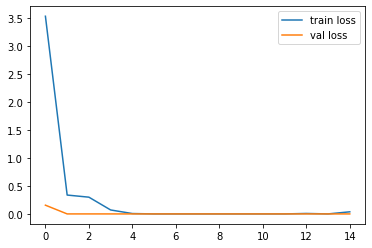

<Figure size 432x288 with 0 Axes>

In [14]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

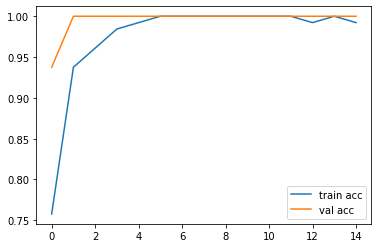

<Figure size 432x288 with 0 Axes>

In [15]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [16]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_MobileNet HGR.h5')

In [17]:

y_pred = model.predict(test_generator)
y_pred

array([[6.43205186e-23, 1.00000000e+00, 2.43468671e-19],
       [8.50283306e-31, 1.46450274e-37, 1.00000000e+00],
       [7.90459011e-23, 1.00000000e+00, 5.56270690e-20],
       [1.00000000e+00, 1.83725166e-26, 4.60899710e-17],
       [1.00000000e+00, 0.00000000e+00, 7.23349862e-35],
       [1.00000000e+00, 4.18585225e-28, 1.69823522e-17],
       [2.33320898e-22, 1.00000000e+00, 6.46042038e-18],
       [2.63311725e-26, 1.00000000e+00, 1.64818003e-23],
       [2.63311725e-26, 1.00000000e+00, 1.64818003e-23],
       [1.00000000e+00, 1.09737439e-26, 8.75264754e-17],
       [1.00000000e+00, 7.41734526e-32, 1.25204663e-18],
       [1.12892023e-30, 7.19794276e-33, 1.00000000e+00],
       [3.43296528e-24, 1.00000000e+00, 4.50557577e-19],
       [2.67769153e-22, 1.00000000e+00, 3.00070779e-19],
       [1.15726703e-22, 1.00000000e+00, 1.98938695e-18],
       [1.10036125e-22, 1.00000000e+00, 1.79233867e-18],
       [1.00000000e+00, 8.36074924e-27, 1.02112012e-16],
       [1.00000000e+00, 5.12463

In [18]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

y_pred

array([1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0,
       2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 0, 1, 2, 0, 0, 0, 1, 1, 1, 2, 2,
       1, 1, 2, 0, 2, 1, 0, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 1, 2, 2, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 2])

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [20]:
model=load_model('model_MobileNet HGR.h5')

In [21]:
img=image.load_img('/content/drive/MyDrive/Datasets/dataset1/test/2_thumb/frame_00_05_0073.png',target_size=(224,224))

In [22]:
x=image.img_to_array(img)
x

array([[[ 4.,  4.,  4.],
        [ 6.,  6.,  6.],
        [ 5.,  5.,  5.],
        ...,
        [ 5.,  5.,  5.],
        [ 4.,  4.,  4.],
        [ 5.,  5.,  5.]],

       [[ 8.,  8.,  8.],
        [ 6.,  6.,  6.],
        [ 7.,  7.,  7.],
        ...,
        [ 5.,  5.,  5.],
        [ 6.,  6.,  6.],
        [ 4.,  4.,  4.]],

       [[ 6.,  6.,  6.],
        [ 6.,  6.,  6.],
        [ 5.,  5.,  5.],
        ...,
        [ 5.,  5.,  5.],
        [ 5.,  5.,  5.],
        [ 4.,  4.,  4.]],

       ...,

       [[ 7.,  7.,  7.],
        [ 6.,  6.,  6.],
        [ 5.,  5.,  5.],
        ...,
        [ 4.,  4.,  4.],
        [ 6.,  6.,  6.],
        [ 5.,  5.,  5.]],

       [[ 6.,  6.,  6.],
        [ 5.,  5.,  5.],
        [ 8.,  8.,  8.],
        ...,
        [ 5.,  5.,  5.],
        [ 6.,  6.,  6.],
        [ 6.,  6.,  6.]],

       [[ 6.,  6.,  6.],
        [ 7.,  7.,  7.],
        [ 7.,  7.,  7.],
        ...,
        [ 6.,  6.,  6.],
        [ 2.,  2.,  2.],
        [12., 12., 12.]]

In [23]:
x.shape

(224, 224, 3)

In [24]:
x=x/255

In [25]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [26]:
img_data

array([[[[-0.999877  , -0.999877  , -0.999877  ],
         [-0.99981546, -0.99981546, -0.99981546],
         [-0.9998462 , -0.9998462 , -0.9998462 ],
         ...,
         [-0.9998462 , -0.9998462 , -0.9998462 ],
         [-0.999877  , -0.999877  , -0.999877  ],
         [-0.9998462 , -0.9998462 , -0.9998462 ]],

        [[-0.99975395, -0.99975395, -0.99975395],
         [-0.99981546, -0.99981546, -0.99981546],
         [-0.9997847 , -0.9997847 , -0.9997847 ],
         ...,
         [-0.9998462 , -0.9998462 , -0.9998462 ],
         [-0.99981546, -0.99981546, -0.99981546],
         [-0.999877  , -0.999877  , -0.999877  ]],

        [[-0.99981546, -0.99981546, -0.99981546],
         [-0.99981546, -0.99981546, -0.99981546],
         [-0.9998462 , -0.9998462 , -0.9998462 ],
         ...,
         [-0.9998462 , -0.9998462 , -0.9998462 ],
         [-0.9998462 , -0.9998462 , -0.9998462 ],
         [-0.999877  , -0.999877  , -0.999877  ]],

        ...,

        [[-0.9997847 , -0.9997847 , -0

In [27]:
model.predict(img_data)

array([[0.6932481 , 0.14387944, 0.16287243]], dtype=float32)

In [28]:
a=np.argmax(model.predict(img_data), axis=1)

In [29]:
a==1

array([False])

In [30]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [31]:
import numpy as np

data3 = np.arange(122304).reshape(52, 2352 )

data3 = data3.reshape((data3.shape[0]*3, 28, 28))

print(data3.shape)

(156, 28, 28)


In [32]:
#confusion matrix
#1.Predict classes
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = [1 * (x[0]>=0.5) for x in predictions]

# 2.Get ground-truth classes and class-labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys()) 

# 3. Use scikit-learn to get statistics
from sklearn.metrics import confusion_matrix,classification_report

print(class_labels)

print(confusion_matrix(test_generator.classes, predicted_classes))
print(classification_report(test_generator.classes, predicted_classes))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  import sys


['1_stop', '2_thumb', '3_ok']
[[17  8  0]
 [16  9  0]
 [17  8  0]]
              precision    recall  f1-score   support

           0       0.34      0.68      0.45        25
           1       0.36      0.36      0.36        25
           2       0.00      0.00      0.00        25

    accuracy                           0.35        75
   macro avg       0.23      0.35      0.27        75
weighted avg       0.23      0.35      0.27        75



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from __future__ import division, print_function
import sys
import os
import glob
import re
import numpy as np
import tensorflow as tf
import tensorflow as tf

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
# Keras
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [34]:
MODEL_PATH = 'model_MobileNet HGR.h5'

# Load your trained model
model = load_model(MODEL_PATH)

In [35]:
img_path = "/content/drive/MyDrive/Datasets/dataset1/test/1_stop/frame_04_01_0048.png"

#img_path = "/content/c25_3.jpg"

img = image.load_img(img_path, target_size=(224, 224))

# Preprocessing the image
x = image.img_to_array(img)
# x = np.true_divide(x, 255)
## Scaling
x = x / 255
x = np.expand_dims(x, axis=0)

# Be careful how your trained model deals with the input
# otherwise, it won't make correct prediction!
# x = preprocess_input(x)

preds = model.predict(x)
print(preds)
maxElement = np.amax(preds)
print(maxElement)
preds = np.argmax(preds, axis=1)
print(preds)
if preds == 0:
    preds = "1_stop"
elif preds == 1:
    preds = "2_thumb"
elif preds == 2:
    preds = "3_ok"



print(preds)

[[1.0000000e+00 4.1859640e-28 1.6982352e-17]]
1.0
[0]
1_stop


In [36]:

for i in range(24):
  j=i+29
  img_path = "/content/drive/MyDrive/Datasets/dataset1/test/1_stop/frame_04_01_00{}.png".format(j)
 

  img = image.load_img(img_path, target_size=(224, 224))

  # Preprocessing the image
  x = image.img_to_array(img)
  # x = np.true_divide(x, 255)
  ## Scaling
  x = x / 255
  x = np.expand_dims(x, axis=0)

  # Be careful how your trained model deals with the input
  # otherwise, it won't make correct prediction!
  #x = preprocess_input(x)

  preds = model.predict(x)
  maxElement = np.amax(preds)
  preds = np.argmax(preds, axis=1)

  if preds == 0:
    preds = "1_stop"
  elif preds == 1:
    preds = "2_thumb"
  elif preds == 2:
    preds = "3_ok"

  print(preds)





1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop


In [37]:
for i in range(24):
  j=i+73
  img_path = "/content/drive/MyDrive/Datasets/dataset1/test/2_thumb/frame_00_05_00{}.png".format(j)
 

  img = image.load_img(img_path, target_size=(224, 224))

  # Preprocessing the image
  x = image.img_to_array(img)
  # x = np.true_divide(x, 255)
  ## Scaling
  x = x / 255
  x = np.expand_dims(x, axis=0)

  # Be careful how your trained model deals with the input
  # otherwise, it won't make correct prediction!
  #x = preprocess_input(x)

  preds = model.predict(x)
  maxElement = np.amax(preds)
  preds = np.argmax(preds, axis=1)

  if preds == 0:
    preds = "1_stop"
  elif preds == 1:
    preds = "2_thumb"
  elif preds == 2:
    preds = "3_ok"

  print(preds)


2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb


In [38]:
for i in range(9):
  j=i+ 1
  img_path = "/content/drive/MyDrive/Datasets/dataset1/test/3_ok/frame_00_07_000{}.png".format(j)
 

  img = image.load_img(img_path, target_size=(224, 224))

  # Preprocessing the image
  x = image.img_to_array(img)
  # x = np.true_divide(x, 255)
  ## Scaling
  x = x / 255
  x = np.expand_dims(x, axis=0)

  # Be careful how your trained model deals with the input
  # otherwise, it won't make correct prediction!
  #x = preprocess_input(x)

  preds = model.predict(x)
  maxElement = np.amax(preds)
  preds = np.argmax(preds, axis=1)

  if preds == 0:
    preds = "1_stop"
  elif preds == 1:
    preds = "2_thumb"
  elif preds == 2:
    preds = "3_ok"

  print(preds)

3_ok
3_ok
3_ok
3_ok
3_ok
3_ok
3_ok
3_ok
3_ok
